In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# Outlier Detection
# IQR+Q1
# 50%
# 24.65->25%+50%
# 24.65->25%
for feature in data:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if data[(data[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


In [9]:
# LOF
# local outlier factor
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(data)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [10]:
data_scores = lof.negative_outlier_factor_
np.sort(data_scores)[0:20]

array([-3.30445978, -2.48884101, -2.28758733, -2.10500141, -2.05369597,
       -2.02885837, -2.01096252, -2.00720763, -1.98655427, -1.95338702,
       -1.91601291, -1.88815728, -1.8134966 , -1.80857804, -1.74187579,
       -1.73154315, -1.71639102, -1.71372358, -1.67587303, -1.64102097])

In [11]:
thresold = np.sort(data_scores)[7]

In [12]:
thresold

-2.007207629622323

In [13]:
outlier = data_scores>thresold

In [14]:
data = data[outlier]

In [15]:
data.shape

(760, 9)

In [16]:
data["Outcome"].value_counts()

Outcome
0    494
1    266
Name: count, dtype: int64

In [17]:
data["Outcome"].value_counts()
class_0 = data[data["Outcome"]==0]
class_1 = data[data["Outcome"]==1]

In [18]:
class_0.shape

(494, 9)

In [19]:
class_1.shape

(266, 9)

In [20]:
data_n = class_1.sample(500, replace=True)
data = pd.concat([class_0, data_n], axis=0)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
630,7,114,64,0,0,27.4,0.732,34,1
702,1,168,88,29,0,35.0,0.905,52,1
269,2,146,0,0,0,27.5,0.240,28,1
70,2,100,66,20,90,32.9,0.867,28,1


In [21]:
categorical_columns = []
numerical_columns = []

for col in data.columns:
    if data[col].dtype == 'object':
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)


In [22]:
print("Numerical Features: ",numerical_columns)

print("\nCategorical Features: ",categorical_columns)

Numerical Features:  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Categorical Features:  []


In [23]:

discrete_features=[feature for feature in numerical_columns if len(data[feature].unique())<25]
discrete_features

['Pregnancies', 'Outcome']

In [24]:
continuous_features=[feature for feature in numerical_columns if feature not in discrete_features]
continuous_features

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [25]:
x =  data.drop(columns=['Outcome'],axis=1)
y = data['Outcome']

In [26]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1,1,85,66,29,0,26.6,0.351,31
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
7,10,115,0,0,0,35.3,0.134,29
10,4,110,92,0,0,37.6,0.191,30
...,...,...,...,...,...,...,...,...
630,7,114,64,0,0,27.4,0.732,34
702,1,168,88,29,0,35.0,0.905,52
269,2,146,0,0,0,27.5,0.240,28
70,2,100,66,20,90,32.9,0.867,28


In [27]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.118379,0.112965,-0.076856,-0.099524,-0.037942,-0.032756,0.525059,0.236366
Glucose,0.118379,1.000000,0.127904,0.064103,0.296040,0.211914,0.116325,0.238001,0.483737
BloodPressure,0.112965,0.127904,1.000000,0.216962,0.079098,0.325525,0.073137,0.259317,0.062610
SkinThickness,-0.076856,0.064103,0.216962,1.000000,0.505546,0.402155,0.193189,-0.098527,0.094622
Insulin,-0.099524,0.296040,0.079098,0.505546,1.000000,0.205845,0.188824,-0.057925,0.145405
BMI,-0.037942,0.211914,0.325525,0.402155,0.205845,1.000000,0.153221,0.032496,0.256233
DiabetesPedigreeFunction,-0.032756,0.116325,0.073137,0.193189,0.188824,0.153221,1.000000,0.034382,0.187611
Age,0.525059,0.238001,0.259317,-0.098527,-0.057925,0.032496,0.034382,1.000000,0.241061
Outcome,0.236366,0.483737,0.062610,0.094622,0.145405,0.256233,0.187611,0.241061,1.000000


<Axes: >

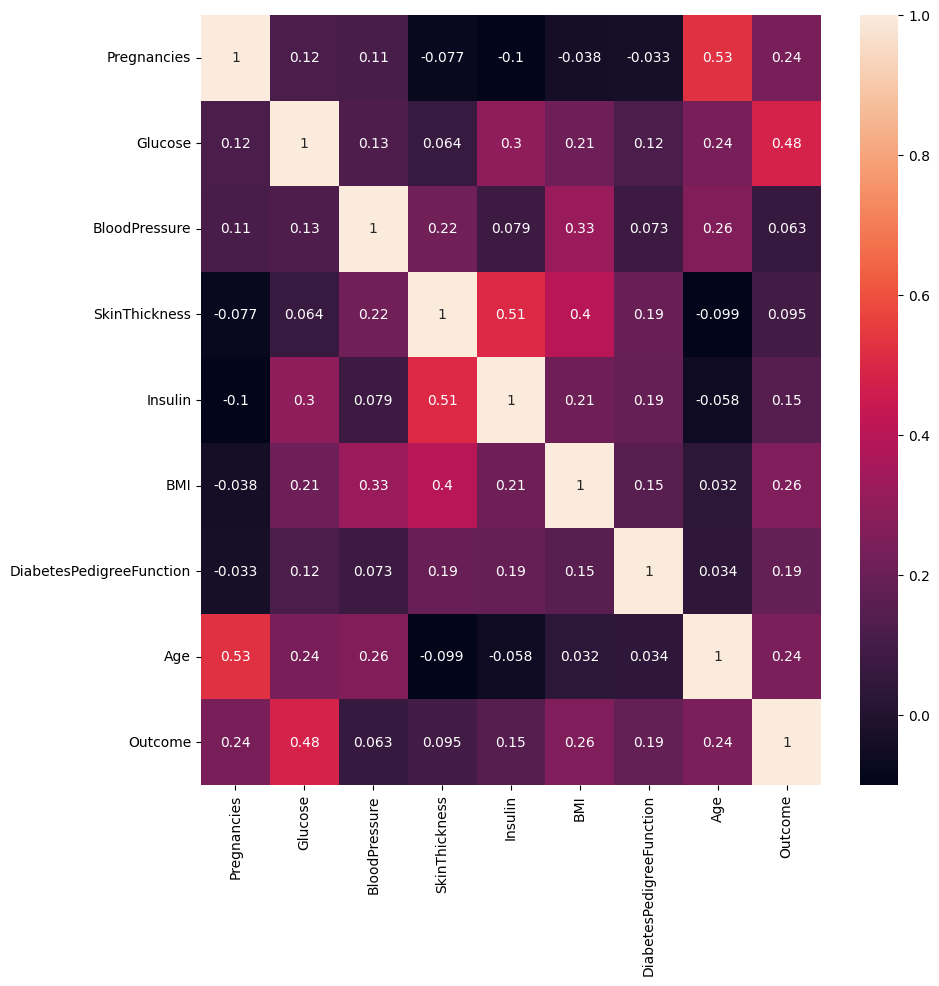

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [31]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [32]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.20,random_state=40,stratify=data['Outcome'])


model training

In [33]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20 ,max_depth=10)
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred = model.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score,  confusion_matrix


In [35]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred)

In [36]:
print(accuracy_score(y_train, model.predict(x_train))*100)

98.23899371069183


In [37]:
print(accuracy_score(y_test, model.predict(x_test))*100)

84.42211055276381


In [38]:
import pickle

In [39]:
pickle.dump(model, open("diabetes1.pkl",'wb'))